 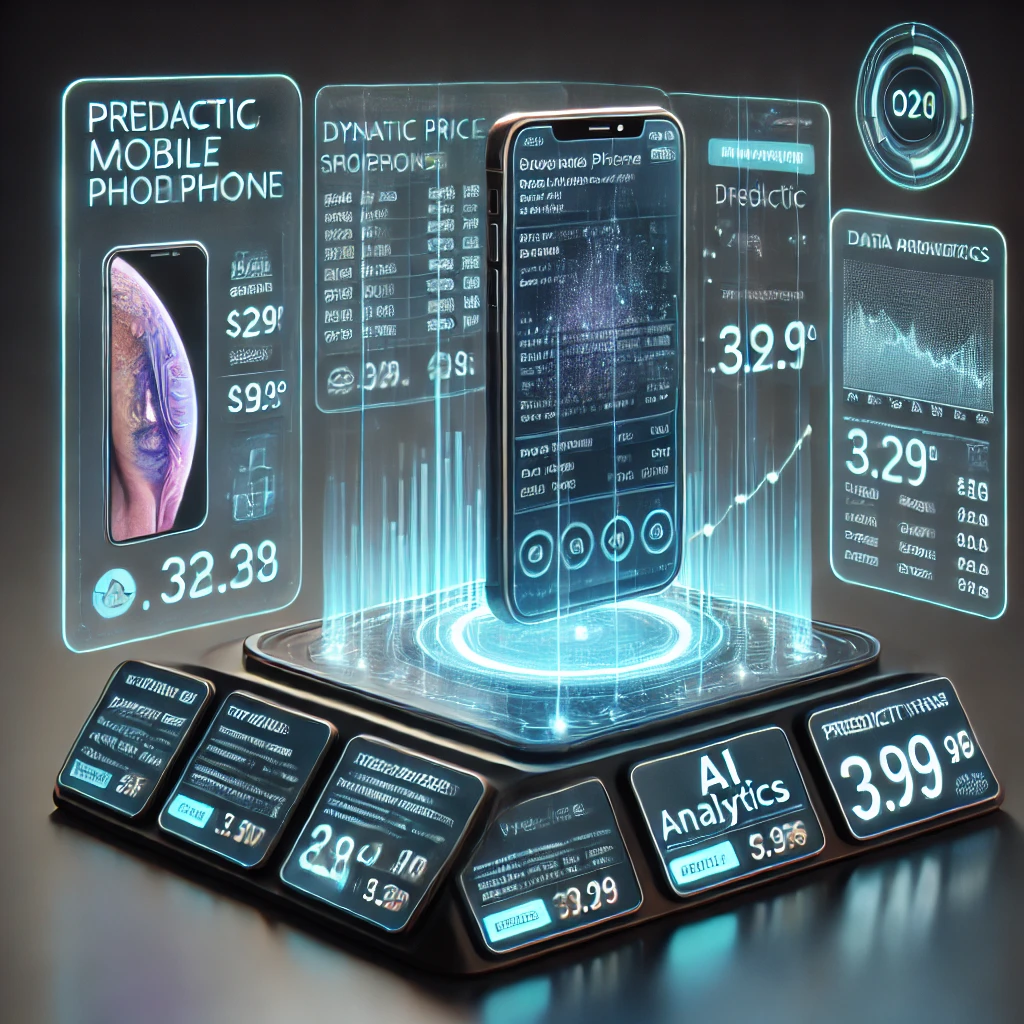

# 1.Loading the dataset: Load the data and import the libraries.


# 2.Data Cleaning:
**1).Data information.**

**2).Description of the data.**

**3).Dropping duplicates.**

**4).Cleaning individual columns.**

**5).Remove the NaN values from the dataset.**


# Some Transformations


# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 
# The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 
# In this problem, we do not have to predict the actual price but a price range indicating how high the price is

## Data Description:-


- Battery_power - Total energy a battery can store in one time measured in mAh
- Blue - Has bluetooth or not
- Clock_speed - speed at which microprocessor executes instructions
- Dual_sim - Has dual sim support or not
- Fc - Front Camera mega pixels
- Four_g - Has 4G or not
- Int_memory - Internal Memory in Gigabytes
- M_dep - Mobile Depth in cm
- Mobile_wt - Weight of mobile phone
- N_cores - Number of cores of processor
- Pc - Primary Camera mega pixels
- Px_height - Pixel Resolution Height
- Px_width - Pixel Resolution Width
- Ram - Random Access Memory in Mega
- Touch_screen - Has touch screen or not
- Wifi - Has wifi or not
- Sc_h - Screen Height of mobile in cm
- Sc_w - Screen Width of mobile in cm
- Talk_time - longest time that a single battery charge will last over a call
- Three_g - Has 3G or not
- Wifi - Has wifi or not
- Price_range - This is the target variable with value of 0(low cost), 1(medium
cost),2(high cost) and 3(very high cost)

# 3.Data Visualization: Using plots to find relations between the features.


# 4. Classification modal

***1.Logistic Regression***

***2.KNN Classification***

***3.Decision Tree Classifier***

***4.Random Forest Classifier***

***5.SVM Classifier with linear kernel***

# Data analysis

In [1]:
# importhig libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# Loading the dataset 

file_path = 'data_mobile_price_range.csv'
data = pd.read_csv(file_path)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
# print a columns name

print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# Description of the data
data.describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
# Total phones with sc_w = 0
print(len(data[data.sc_w == 0]))
# Total phone with px_height = 0
print(len(data[data.px_height == 0]))

180
2


In [7]:
data['sc_w'] = data['sc_w'].astype(float)
data['px_height'] = data['px_height'].astype(float)

data.loc[data['sc_w'] == 0, 'sc_w'] = data['sc_w'].mean()
data.loc[data['px_height'] == 0, 'px_height'] = data['px_height'].mean()


In [8]:
# Description of the data
data.describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


In [9]:
#checking whether there is duplicates or not
len(data[data.duplicated()])


0

**there are no duplicates values**

In [10]:
# The nunique () method returns the number of unique values for each column
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [11]:
#checking whether there is null values or not
print("Missing valus in each colum:")
print(data.isna().sum())

Missing valus in each colum:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# visualization

**price**

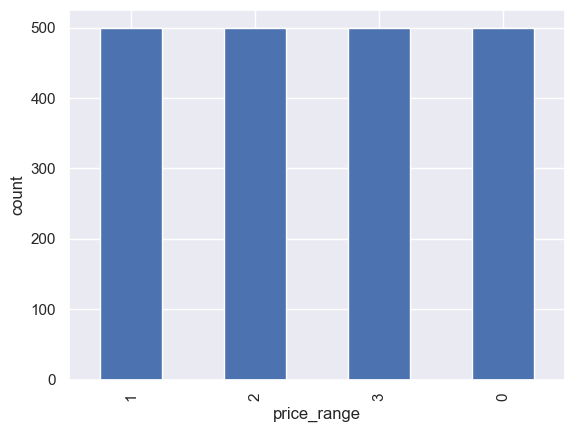

In [12]:
sns.set()
price_plot = data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()

  **Battery power**

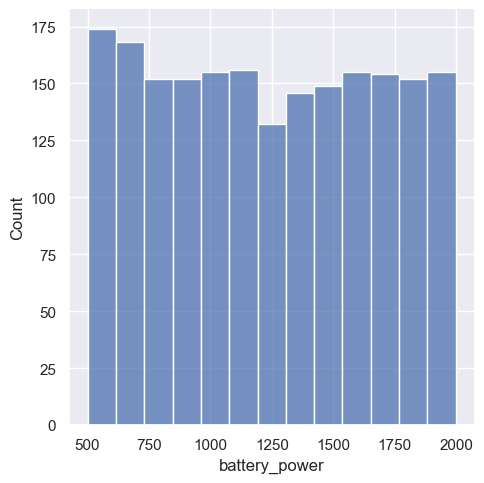

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.displot(data["battery_power"])
plt.show()

**Bluetooth**

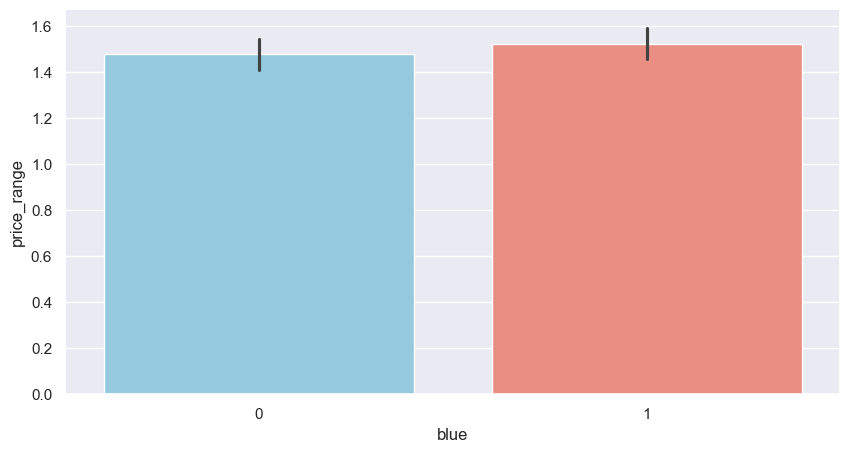

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=data, x='blue', y='price_range', hue='blue', ax=ax, palette={0: 'skyblue', 1: 'salmon'}, legend=False)
plt.show()


**RAM**

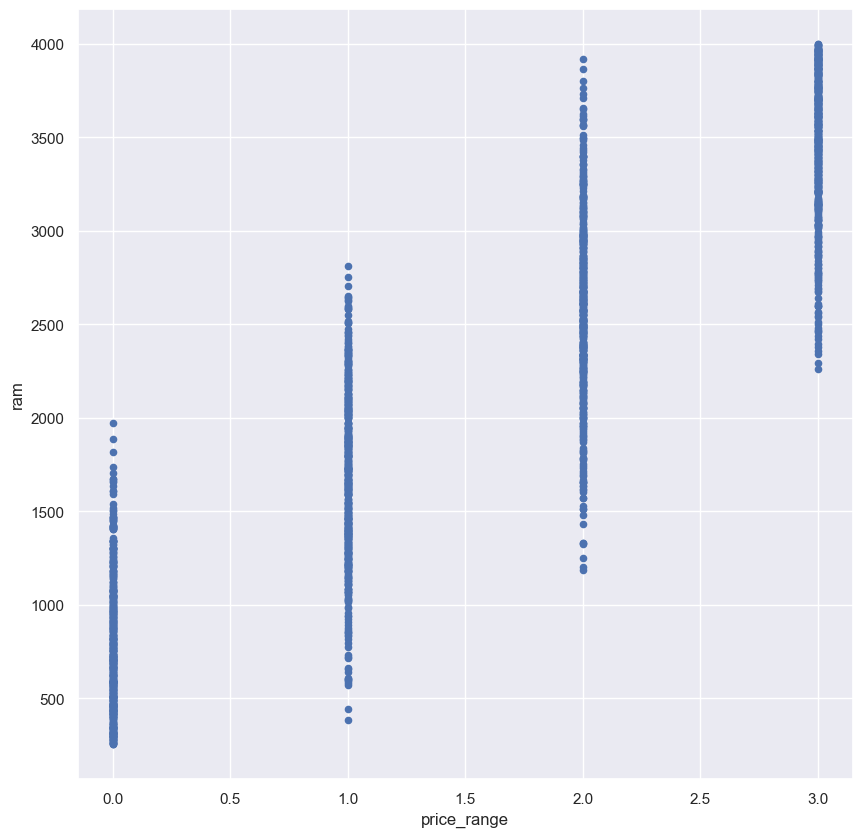

In [15]:
data.plot(x='price_range',y='ram',kind='scatter')
plt.show()


**pixel_width**

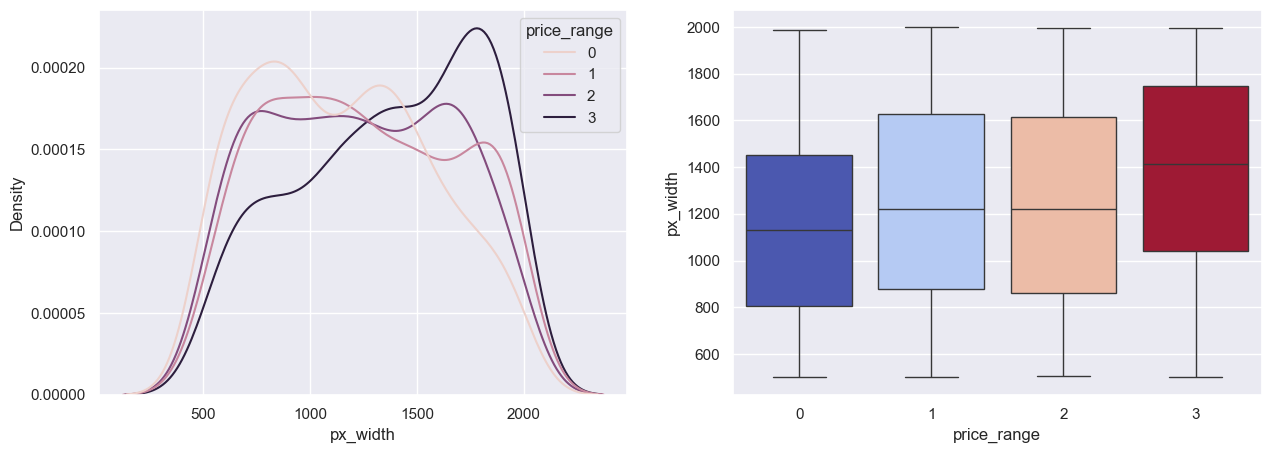

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=data, x='price_range', y='px_width', ax=axs[1], hue='price_range', palette='coolwarm', legend=False)
plt.show()


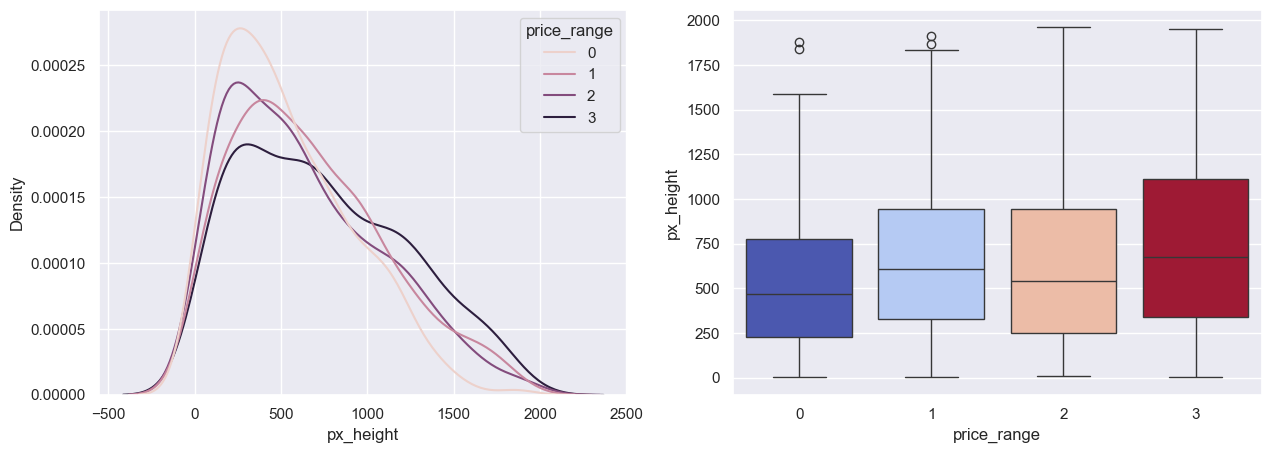

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=data, x='price_range', y='px_height', ax=axs[1], hue='price_range', palette='coolwarm', legend=False)
plt.show()


**mobile weight**



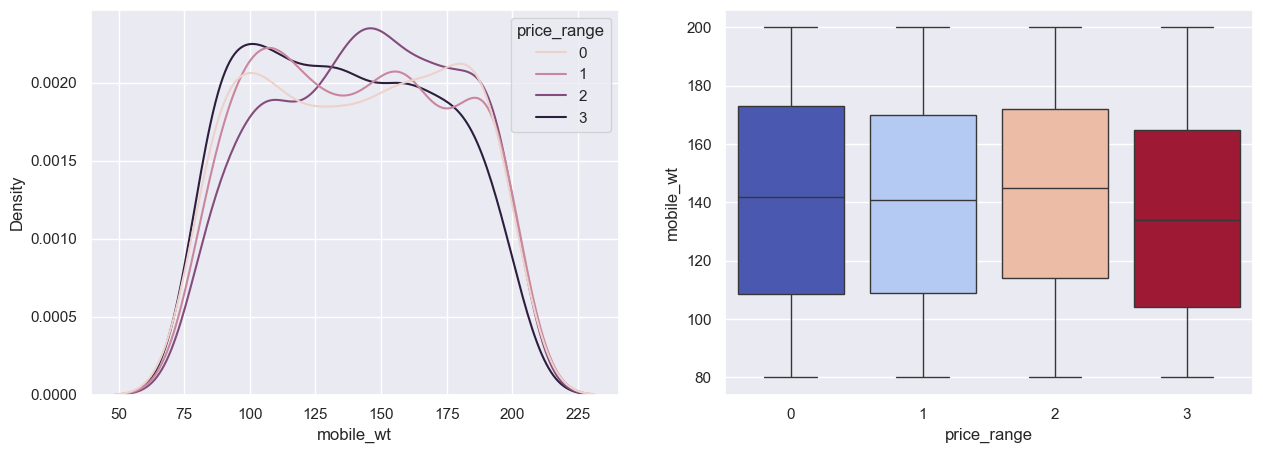

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=data, x='price_range', y='mobile_wt', ax=axs[1],hue='price_range', palette='coolwarm', legend=False)
plt.show()


**screen_size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.



In [19]:
# Defining new variable sc_size

data['sc_size'] = np.sqrt((data['sc_h']**2) + (data['sc_w']**2))
data['sc_size'] = round(data['sc_size']/2.54, 2)


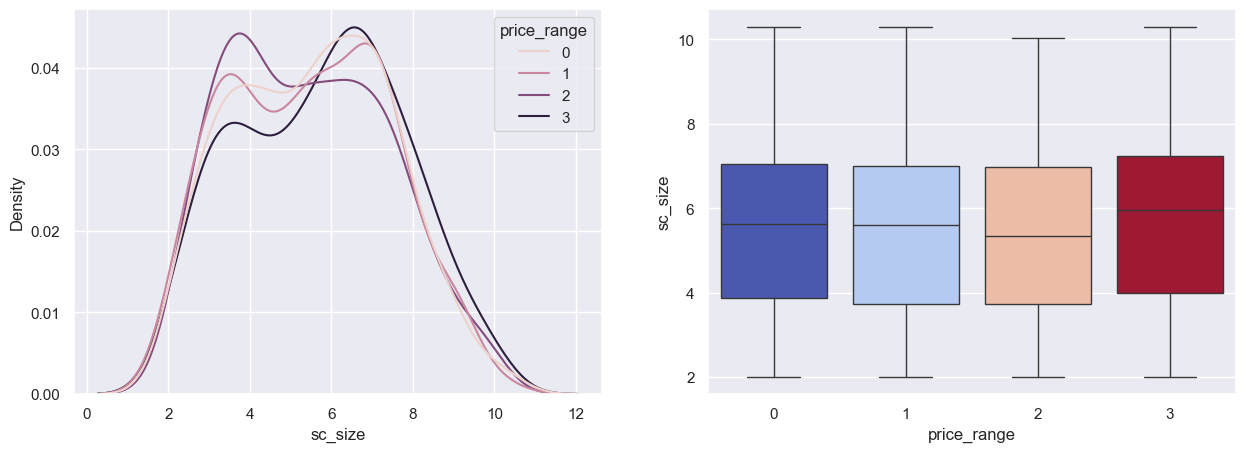

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=data, x='price_range', y='sc_size', ax=axs[1], hue='price_range', palette='coolwarm', legend=False)
plt.show()

# MACHINE LEARNING

In [21]:
# Defining x and y

X = data.drop(['price_range'], axis = 1)
y = data['price_range']

In [22]:
X.shape

(2000, 21)

In [23]:
y.shape

(2000,)

In [24]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
 

##  Splitting the Dataset

In [25]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [26]:
X_train.shape

(1600, 21)

In [27]:
y_train.shape

(1600,)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.9900495 ,
         1.00250313, -0.11345495],
       [-1.3795348 ,  1.01892912,  0.83711156, ...,  0.9900495 ,
         1.00250313, -0.59855065],
       [-0.01091435, -0.98142253, -0.74838475, ..., -1.0100505 ,
         1.00250313,  0.88737408],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ..., -1.0100505 ,
         1.00250313,  1.08141236],
       [ 1.55743843, -0.98142253, -0.74838475, ...,  0.9900495 ,
         1.00250313,  1.08141236],
       [-1.37499543,  1.01892912, -1.11426851, ..., -1.0100505 ,
        -0.99750312,  0.73929223]], shape=(1600, 21))

In [30]:
X_test

array([[ 0.91965677, -0.98142253,  1.20299532, ...,  0.9900495 ,
        -0.99750312, -0.80790774],
       [-0.13347738, -0.98142253, -1.23622976, ..., -1.0100505 ,
        -0.99750312,  2.30691729],
       [ 1.65957429, -0.98142253,  1.69084034, ...,  0.9900495 ,
        -0.99750312, -1.20109057],
       ...,
       [-0.446694  , -0.98142253,  0.34926654, ...,  0.9900495 ,
         1.00250313,  1.06098728],
       [-1.16391466, -0.98142253,  1.44691783, ...,  0.9900495 ,
         1.00250313, -1.79341796],
       [-0.12666832, -0.98142253,  0.4712278 , ...,  0.9900495 ,
         1.00250313,  0.42270346]], shape=(400, 21))

## a) Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [32]:
pv1 = lr.predict(X_test)
print(pv1)


[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

a1 = accuracy_score(y_test, pv1)
print('Accuracy Score:', a1)
print('\nConfusion Matrix:\n', confusion_matrix(y_test, pv1))

Accuracy Score: 0.98

Confusion Matrix:
 [[103   2   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


In [34]:
print('\nClassification Report:\n', classification_report(y_test, pv1, zero_division=1))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



## b) KNN Classification


In [35]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=15)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [36]:
pv2 = Knn.predict(X_test)
print(pv2)

[0 1 0 2 1 2 1 0 3 1 1 0 1 3 2 2 2 3 1 0 0 0 0 1 0 1 2 2 1 0 0 0 3 0 0 1 2
 0 3 0 2 3 3 0 2 1 1 2 3 1 3 0 1 0 1 2 1 3 0 0 0 2 2 2 0 0 3 3 2 1 2 3 0 1
 2 0 2 3 2 2 3 0 1 1 0 3 0 2 2 0 2 3 2 2 3 1 1 3 2 2 0 1 2 1 0 3 2 0 0 1 0
 0 2 2 1 2 3 2 0 2 0 1 3 1 3 3 1 2 1 3 2 0 1 2 0 3 1 1 1 2 1 0 3 1 1 0 1 0
 1 2 3 2 2 0 2 1 0 2 0 1 3 3 3 3 1 1 0 2 2 3 2 1 0 0 3 1 0 2 1 1 0 0 0 0 2
 3 1 2 0 1 0 0 1 3 3 3 0 0 2 0 2 1 1 3 2 1 0 2 1 0 0 3 2 1 2 0 1 2 2 1 2 1
 2 0 0 2 0 2 1 0 2 0 1 3 2 0 1 3 2 0 1 2 2 3 0 2 1 3 3 2 3 1 0 3 3 2 3 3 2
 3 3 0 2 2 1 0 2 0 1 3 2 2 2 2 0 1 1 1 2 1 2 1 0 3 1 3 0 0 2 0 2 1 3 3 2 1
 1 1 0 3 3 0 2 1 2 0 2 3 1 3 2 3 2 0 3 1 0 2 0 0 0 3 3 3 1 0 2 1 1 1 1 0 2
 3 2 0 1 0 0 1 0 3 2 0 2 2 1 1 1 3 0 0 1 3 3 1 2 0 0 3 0 0 1 1 2 3 0 2 1 2
 3 3 3 1 2 1 0 3 1 3 3 0 2 3 1 2 3 3 0 1 0 3 1 0 2 2 1 1 0 2]


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a2 = accuracy_score(y_test,pv2)
print('Accuracy Score:\n',a2)
print('\nConfusion Matrix:',confusion_matrix(y_test,pv2))
print('\nClassification Report:\n',classification_report(y_test,pv2))


Accuracy Score:
 0.5625

Confusion Matrix: [[78 26  1  0]
 [26 37 27  1]
 [ 5 33 41 13]
 [ 0  7 36 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       105
           1       0.36      0.41      0.38        91
           2       0.39      0.45      0.42        92
           3       0.83      0.62      0.71       112

    accuracy                           0.56       400
   macro avg       0.57      0.55      0.56       400
weighted avg       0.59      0.56      0.57       400



## C) Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier(criterion='entropy')
de.fit(X_train , y_train)


DecisionTreeClassifier(criterion='entropy')

In [39]:
pv3 = de.predict(X_test)
print(pv3)

[0 2 1 3 1 1 1 0 2 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 1 0 3 0 1 1 2
 0 3 1 2 3 2 0 3 3 1 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 1 2 0 1
 2 0 0 3 2 1 3 2 1 0 2 3 2 3 3 0 2 3 1 1 3 2 2 3 1 2 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 1 2 3 0 2 3 1 2 1 0 0 2 3 0 3 2 0 0 0 1
 2 3 3 1 1 0 2 2 0 1 0 2 2 3 2 2 1 0 0 2 2 2 3 1 1 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 1 0 0 1 3 2 1 0 1 2 1 1 2 2 2 2 3 1 2 0 0 1 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 0 1 3 3 0 3 3 3
 3 3 0 2 1 3 1 3 0 1 3 2 2 2 1 0 1 0 2 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 1 2 3 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 0 2 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 1 3 2 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 1 1 1 2]


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a3 = accuracy_score(y_test,pv3)
print('Accuracy Score:',a3)
print('\nConfusion Matrix: ',confusion_matrix(y_test,pv3))
print('\nClassification Report:\n',classification_report(y_test,pv3))


Accuracy Score: 0.84

Confusion Matrix:  [[90 15  0  0]
 [ 7 75  9  0]
 [ 0 12 72  8]
 [ 0  0 13 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       105
           1       0.74      0.82      0.78        91
           2       0.77      0.78      0.77        92
           3       0.93      0.88      0.90       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



## d) Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=6)
rn.fit(X_train , y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=70)

In [42]:
pv4 = rn.predict(X_test)
print(pv4)


[0 2 0 3 1 2 2 0 3 1 0 0 2 3 2 2 3 3 1 0 0 1 0 1 0 1 2 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 3 2 1 3 1 3 1 0 0 1 1 1 3 0 0 0 3 3 2 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 0 1 0
 0 3 1 2 2 3 3 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 2 3 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 2 1 1 2 1 2 2 3 1 3 0 0 0 1 1 1 3 1 0 2 2 1 3 1
 3 0 0 2 1 3 0 0 1 0 1 3 2 0 1 3 3 0 2 3 3 3 0 3 1 2 3 3 3 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 1 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 0 3 3 3 1 0 1 0 2 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 1 2 3 1 0 0 3 3 0 3 0 0 1 0 0 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 2 3 3 0 1 3 1 3 3 3 0 0 2 3 0 0 2 3 1 1 1 2]


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a4 = accuracy_score(y_test,pv4)
print('Accuracy Score:',a4)
print('\nConfusion Matrix: ',confusion_matrix(y_test,pv4))
print('\nClassification Report:\n',classification_report(y_test,pv4))


Accuracy Score: 0.8525

Confusion Matrix:  [[102   3   0   0]
 [ 11  68  12   0]
 [  0  14  69   9]
 [  0   0  10 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       105
           1       0.80      0.75      0.77        91
           2       0.76      0.75      0.75        92
           3       0.92      0.91      0.91       112

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



## e) SVM Classifier with linear kernel


In [44]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear',C=0.01)
svm_linear.fit(X_train,y_train)


SVC(C=0.01, kernel='linear')

In [45]:
pv5 = svm_linear.predict(X_test)
print(pv5)


[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 2 1 2
 0 3 0 2 3 2 0 2 2 1 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 1 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 2 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 2 0 2 2 3 3 2 1 0 1 2 2 2 2 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 2 1 1 2 2 2 2 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 1
 3 0 0 2 1 3 0 1 1 0 2 3 2 0 1 2 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 0 2 3 3 1 0 1 0 1 2 2 0 2
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a5 = accuracy_score(y_test,pv5)
print('Accuracy Score:',a5)
print('\nConfusion Matrix: ',confusion_matrix(y_test,pv5))
print('\nClassification Report:\n',classification_report(y_test,pv5))


Accuracy Score: 0.9225

Confusion Matrix:  [[102   3   0   0]
 [  0  87   4   0]
 [  0   8  82   2]
 [  0   0  14  98]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.89      0.96      0.92        91
           2       0.82      0.89      0.85        92
           3       0.98      0.88      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400



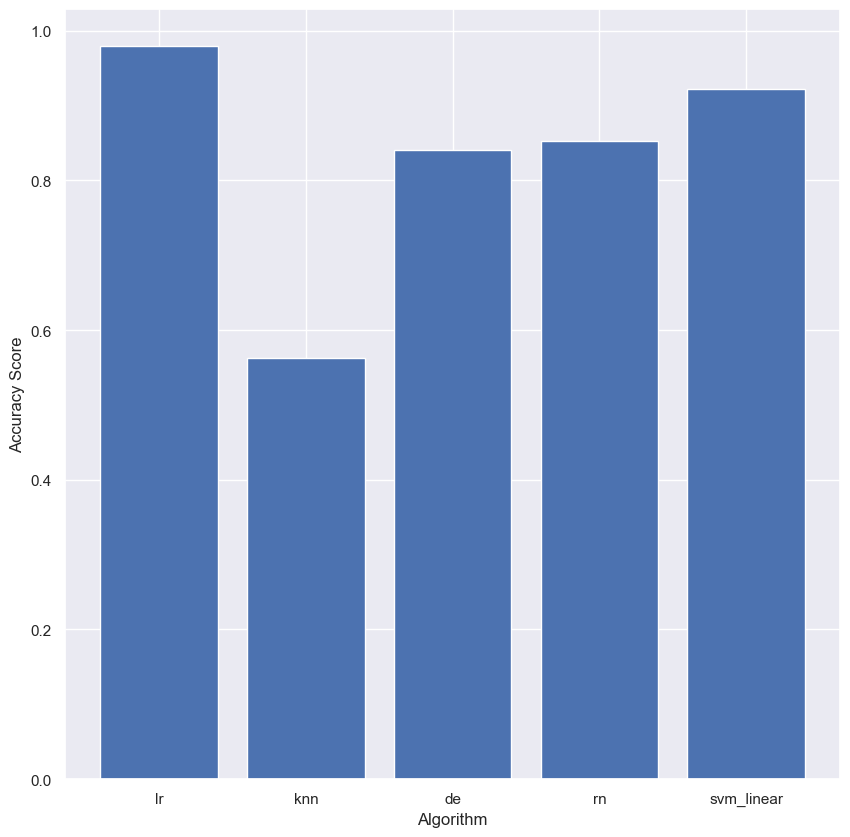

In [47]:
#To check the model with the best accuracy
plt.bar(x=['lr','knn','de','rn','svm_linear'],height=[a1,a2,a3,a4,a5])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()


## The model with the best accuracy: Logistic Regression
